Importing the Necessary Modules

In [43]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Connecting to the Database

In [ ]:
db_username_0 = 'simulationuser'
db_password_0 = 'simulations2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulations_data'
table_name_0 = 'composite_data'

In [ ]:
connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df = pd.read_sql(query, engine)

The DataFrame

In [ ]:
df.head()

id       eps  n_0_squared  \
0  1500  0.123943   318.864022   
1  1501  0.123943   318.864022   
2  1502  0.123943   318.864022   
3  1503  0.123943   318.864022   
4  1504  0.123943   318.864022   

                                               psi_e  \
0  [-0.011744609035812982, -0.011215305626181015,...   
1  [-0.008147157474100065, -0.008292099833020762,...   
2  [-0.003781434990007615, -0.001308768972368787,...   
3  [-0.008102021680746106, -0.007577287179778589,...   
4  [-0.0007052290130828054, -0.003475921446700475...   

                                                 b_e  \
0  [-5.517162102724528, -3.1920707854231463, -0.9...   
1  [-0.832904729882089, 0.14071461474575664, 1.27...   
2  [7.429632504232679, 7.616174400779771, 7.45893...   
3  [-13.405475487140006, -12.142974722866745, -10...   
4  [7.188510348955567, 7.255315274332748, 7.40112...   

                                            psi_plus  \
0  [-0.0016475367466768115, -0.002355776502265530...   
1  [0.0006807256129005129, 0.0007313699095774325,...   
2  [0.0017201097552821953, 0.0016973192181066884,...   
3  [-0.007065355563569785, -0.007211423776971252,...   
4  [0.01155266108186768, 0.011468163968599393, 0....   

                                              b_plus  \
0  [10.73076649947905, 10.77581128940965, 10.5402...   
1  [-0.7190970906032216, -0.6095182673572732, -0....   
2  [0.26192796713213556, -0.016191321040263613, -...   
3  [3.432058579711073, 2.9279736455346024, 2.4210...   
4  [-0.9665805895951766, 0.23618988496103174, 1.4...   

                                              u_list  \
0  [0.4615413218450946, 0.4686702377764153, 0.478...   
1  [0.23703131704960073, 0.23479400902756253, 0.2...   
2  [0.3398928494975913, 0.33847860008307173, 0.33...   
3  [0.15021463519080008, 0.17082991418834997, 0.1...   
4  [0.1388431307750241, 0.13278906064134477, 0.12...   

                                              r_list  \
0  [0.6551578220909112, 0.8945764375320215, 1.175...   
1  [-0.18778048603775238, -0.2053401462453807, -0...   
2  [-0.22023434840890527, -0.0752140155360062, 0....   
3  [1.9382048681079675, 1.850150346137473, 2.4148...   
4  [-0.2758572865676108, -1.3496964429839466, 0.2...   

                                      k_e_psi_e_list  \
0  [0.00013793584140409996, 0.0001257830802886475...   
1  [6.637617490778455e-05, 6.875891964078295e-05,...   
2  [1.4299250583653892e-05, 1.7128762230352505e-0...   
3  [6.564275531527996e-05, 5.7415281004836965e-05...   
4  [4.973479608937477e-07, 1.2082029903632324e-05...   

                                        k_e_b_e_list  \
0  [30.43907766773974, 10.189315899151941, 0.8663...   
1  [0.6937302890599556, 0.019800602803046713, 1.6...   
2  [55.199439147950756, 58.00611250309311, 55.635...   
3  [179.70677303631157, 147.4518351201807, 119.05...   
4  [51.67468103704128, 52.63959972996608, 54.7766...   

                                   k_e_psi_plus_list  \
0  [2.7143773316504123e-06, 5.549682928626416e-06...   
1  [4.6338736005877887e-07, 5.349019446353018e-07...   
2  [2.958777570216974e-06, 2.8808925281543e-06, 2...   
3  [4.991924923966652e-05, 5.2004632891066315e-05...   
4  [0.0001334639780725001, 0.00013151878481068138...   

                                     k_e_b_plus_list  \
0  [115.14934966634185, 116.11810894496844, 111.0...   
1  [0.5171006257140178, 0.3715125182422124, 0.293...   
2  [0.06860625996597308, 0.0002621588770288832, 0...   
3  [11.779026094568387, 8.573029668945189, 5.8616...   
4  [0.9342780361821591, 0.055785661757905405, 2.0...   

                            heat_flux_psi_e_b_e_list  \
0  [0.06479691188370344, 0.035800049438924265, 0....   
1  [0.006785805995272157, -0.0011668196334368695,...   
2  [-0.028094672314403355, -0.009967812743890003,...   
3  [0.10861145303751879, 0.09201080669195365, 0.1...   
4  [-0.0050695460589294675, -0.02521890596462674,...   

                         heat_flux_psi_e_b_plus_list  \
0  [-0.1260286571909809, -0.120854016

Verifying Details

In [ ]:
def length_of_the_first_entry(series):
    return len(series.iloc[0])

selected_columns = df.iloc[:,3:]

lengths = selected_columns.apply(length_of_the_first_entry)
lengths

psi_e                          1000
b_e                            1000
psi_plus                       1000
b_plus                         1000
u_list                         1000
r_list                         1000
k_e_psi_e_list                 1000
k_e_b_e_list                   1000
k_e_psi_plus_list              1000
k_e_b_plus_list                1000
heat_flux_psi_e_b_e_list       1000
heat_flux_psi_e_b_plus_list    1000
b_e_psi_plus_list              1000
b_e_b_plus_list                1000
psi_plus_b_plus_list           1000
eta_list                       1000
dtype: int64

In [6]:
df.describe(include='all')

id           eps   n_0_squared  \
count   10714.000000  1.071400e+04  1.071400e+04   
unique           NaN           NaN           NaN   
top              NaN           NaN           NaN   
freq             NaN           NaN           NaN   
mean     6856.500000  1.239427e-01  3.188640e+02   
std      3093.009726  2.151158e-14  2.933257e-11   
min      1500.000000  1.239427e-01  3.188640e+02   
25%      4178.250000  1.239427e-01  3.188640e+02   
50%      6856.500000  1.239427e-01  3.188640e+02   
75%      9534.750000  1.239427e-01  3.188640e+02   
max     12213.000000  1.239427e-01  3.188640e+02   

                                                    psi_e  \
count                                               10714   
unique                                              10714   
top     [-0.011744609035812982, -0.011215305626181015,...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                      b_e  \
count                                               10714   
unique                                              10714   
top     [-5.517162102724528, -3.1920707854231463, -0.9...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                 psi_plus  \
count                                               10714   
unique                                              10714   
top     [-0.0016475367466768115, -0.002355776502265530...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                   b_plus  \
count                                               10714   
unique                                              10714   
top     [10.73076649947905, 10.77581128940965, 10.5402...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                   u_list  \
count                                               10714   
unique                                              10714   
top     [0.4615413218450946, 0.4686702377764153, 0.478...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                               

Defining Common Functions

In [7]:
def average_arrays(*arrays):
    if not arrays:
        raise ValueError("No arrays provided for averaging.")
    
    np_arrays = [np.array(arr) for arr in arrays]
    array_lengths = [len(arr) for arr in np_arrays]

    if len(set(array_lengths)) != 1:
        raise ValueError("All input arrays must have the same length.")
    
    average_array = np.mean(np_arrays, axis=0)
    
    return average_array

Composite Analysis of All the Data

In [8]:
average_psi_e = average_arrays(*list(df['psi_e']))
average_b_e = average_arrays(*list(df['b_e']))
average_psi_plus = average_arrays(*list(df['psi_plus']))
average_b_plus = average_arrays(*list(df['b_plus']))
average_U = average_arrays(*list(df['u_list']))
average_R = average_arrays(*list(df['r_list']))
average_k_e_psi_e_list = average_arrays(*list(df['k_e_psi_e_list']))
average_k_e_b_e_list = average_arrays(*list(df['k_e_b_e_list']))
average_k_e_psi_plus_list = average_arrays(*list(df['k_e_psi_plus_list']))
average_k_e_b_plus_list = average_arrays(*list(df['k_e_b_plus_list']))
average_heat_flux_psi_e_b_e_list = average_arrays(*list(df['heat_flux_psi_e_b_e_list']))
average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df['heat_flux_psi_e_b_plus_list']))
average_b_e_psi_plus_list = average_arrays(*list(df['b_e_psi_plus_list']))
average_b_e_b_plus_list = average_arrays(*list(df['b_e_b_plus_list']))
average_psi_plus_b_plus_list = average_arrays(*list(df['psi_plus_b_plus_list']))
average_eta = average_arrays(*list(df['eta_list']))

In [9]:
window_size = 5000
dt = .001
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387

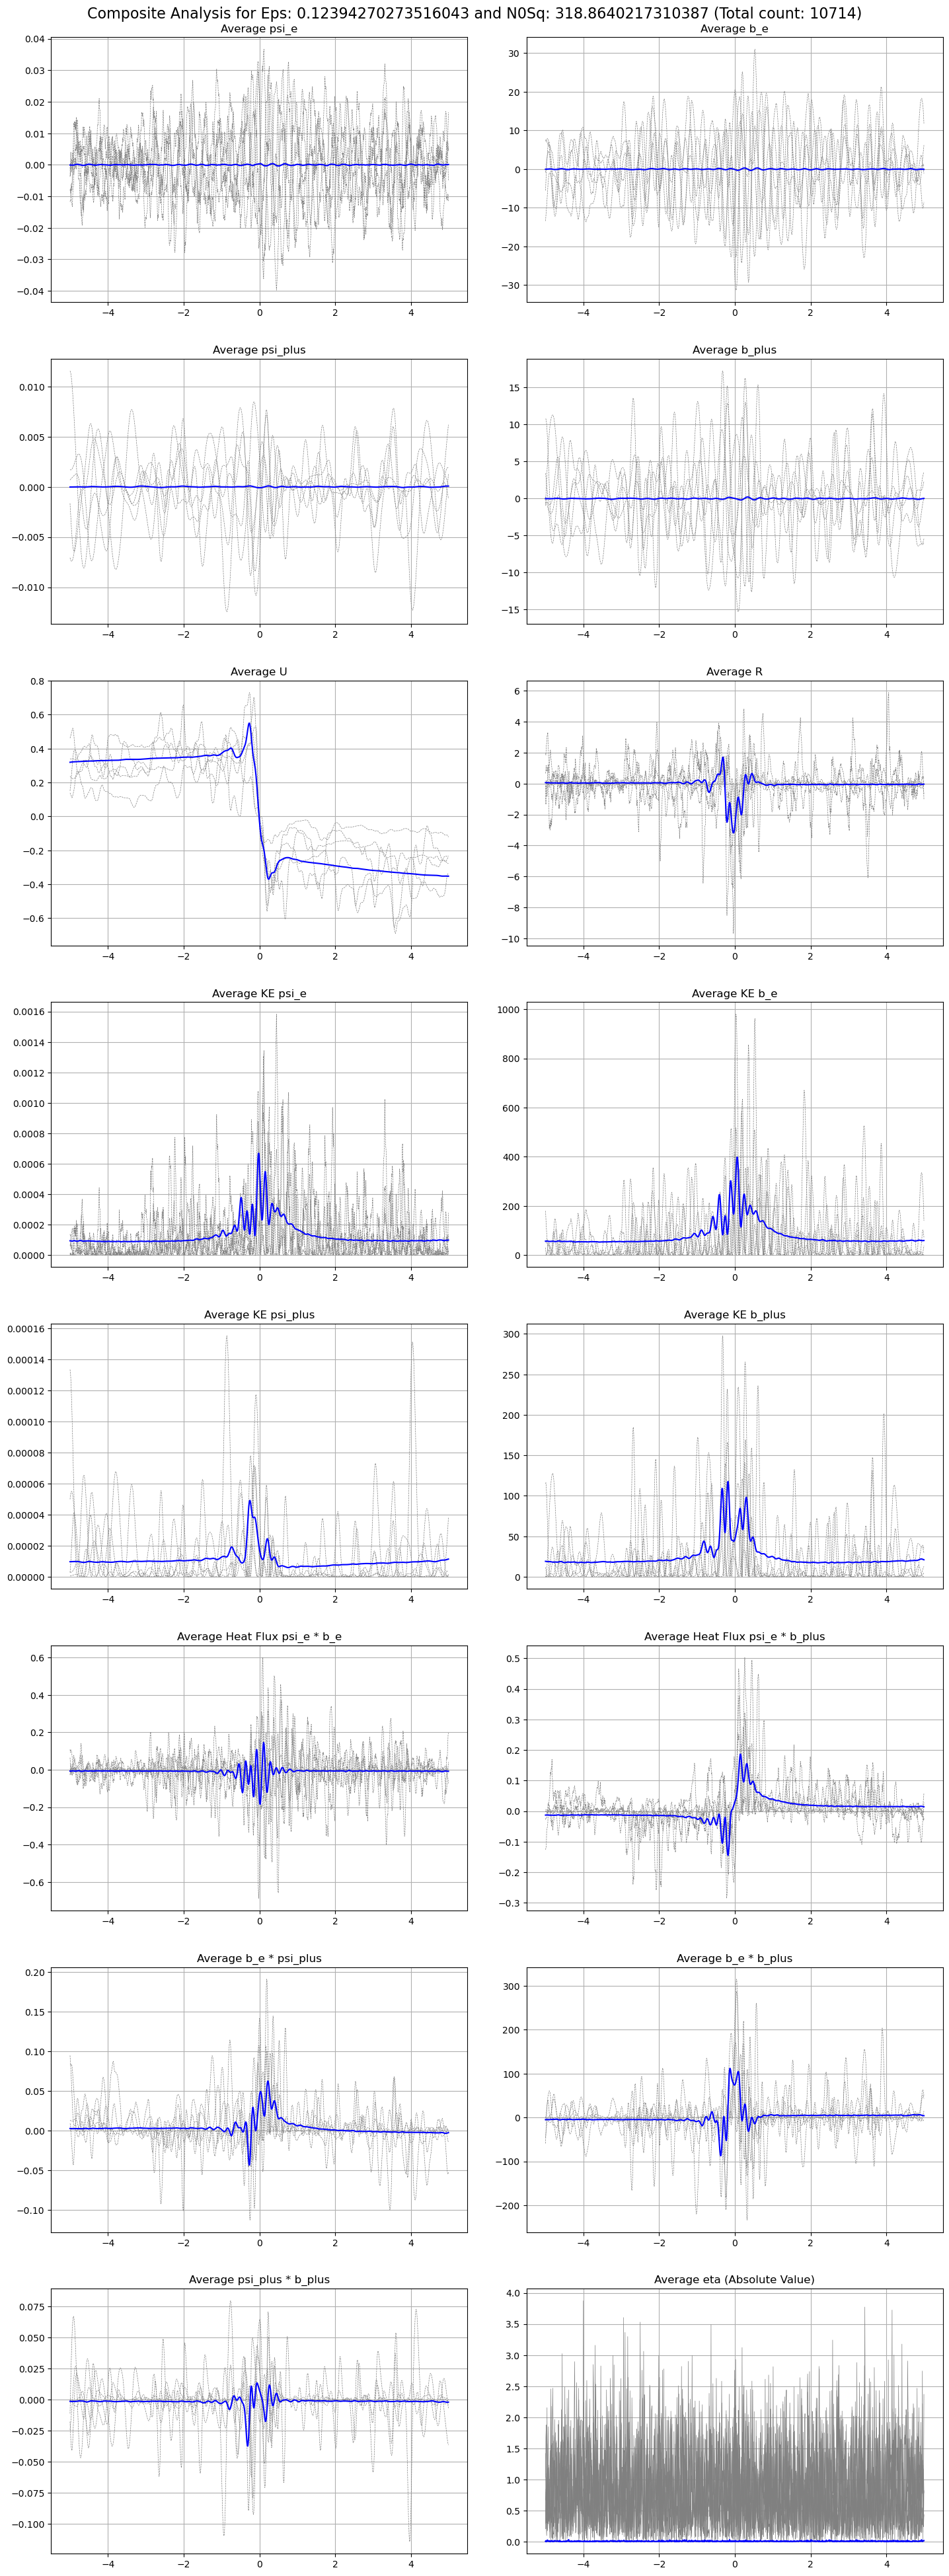

In [10]:
time_array = np.arange(-window_size/10, window_size/10) * dt * 10

fig, axs = plt.subplots(8, 2, figsize=(15, 40))

for i in range(5):
    axs[0, 0].plot(time_array, df['psi_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 0].plot(time_array, average_psi_e, label='Average', linewidth=1.5, color='blue')
axs[0, 0].set_title(f'Average psi_e')
axs[0, 0].grid()


for i in range(5):
    axs[0, 1].plot(time_array, df['b_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 1].plot(time_array, average_b_e, label='Average', linewidth=1.5, color='blue')
axs[0, 1].set_title(f'Average b_e')
axs[0, 1].grid()

for i in range(5):
    axs[1, 0].plot(time_array, df['psi_plus'][i],linewidth=0.5, linestyle='--', color='gray') 
axs[1, 0].plot(time_array, average_psi_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 0].set_title(f'Average psi_plus')
axs[1, 0].grid()

for i in range(5):
    axs[1, 1].plot(time_array, df['b_plus'][i], linewidth=0.5, linestyle='--', color='gray')
axs[1, 1].plot(time_array, average_b_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 1].set_title(f'Average b_plus')
axs[1, 1].grid()

for i in range(5):
    axs[2, 0].plot(time_array, df['u_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 0].plot(time_array, average_U, label='Average', linewidth=1.5, color='blue')
axs[2, 0].set_title(f'Average U')
axs[2, 0].grid()

for i in range(5):
    axs[2, 1].plot(time_array, df['r_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 1].plot(time_array, average_R, label='Average', linewidth=1.5, color='blue')
axs[2, 1].set_title(f'Average R')
axs[2, 1].grid()

for i in range(5):
    axs[3, 0].plot(time_array, df['k_e_psi_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[3, 0].plot(time_array, average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 0].set_title(f'Average KE psi_e')
axs[3, 0].grid()

for i in range(5):
    axs[3, 1].plot(time_array, df['k_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[3, 1].plot(time_array, average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 1].set_title(f'Average KE b_e')
axs[3, 1].grid()

for i in range(5):
    axs[4, 0].plot(time_array, df['k_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[4, 0].plot(time_array, average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 0].set_title(f'Average KE psi_plus')
axs[4, 0].grid()

for i in range(5):
    axs[4, 1].plot(time_array, df['k_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[4, 1].plot(time_array, average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 1].set_title(f'Average KE b_plus')
axs[4, 1].grid()

for i in range(5):
    axs[5, 0].plot(time_array, df['heat_flux_psi_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 0].plot(time_array, average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
axs[5, 0].grid()

for i in range(5):
    axs[5, 1].plot(time_array, df['heat_flux_psi_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 1].plot(time_array, average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
axs[5, 1].grid()

for i in range(5):
    axs[6, 0].plot(time_array, df['b_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 0].plot(time_array, average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 0].set_title(f'Average b_e * psi_plus')
axs[6, 0].grid()

for i in range(5):
    axs[6, 1].plot(time_array, df['b_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 1].plot(time_array, average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 1].set_title(f'Average b_e * b_plus')
axs[6, 1].grid()

for i in range(5):
    axs[7, 0].plot(time_array, df['psi_plus_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[7, 0].plot(time_array, average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[7, 0].set_title(f'Average psi_plus * b_plus')
axs[7, 0].grid()

average_eta = [[abs(i) for i in sublist] for sublist in average_eta]

for i in range(5): #Check if the average eta is the same using randn 
    axs[7, 1].plot(time_array, [abs(i[0]) for i in df['eta_list'][i]], linewidth=0.5, linestyle='-', label=f'eta_list {i}', color = 'gray')
axs[7, 1].plot(time_array, [abs(i[0]) for i in average_eta], label='Average', linewidth=1.5, color='blue')
axs[7, 1].set_title('Average eta (Absolute Value)')
axs[7, 1].grid()


plt.suptitle(f'Composite Analysis for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df['b_e']))})', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

plt.tight_layout(pad = 3)

plt.show()

Verifying the result by splitting

In [11]:
df = df.sample(frac=1).reset_index(drop=True)

half_index = len(df) // 2
df1 = df.iloc[:half_index]
df2 = df.iloc[half_index:]

In [12]:
df1.describe(include='all')

id           eps   n_0_squared  \
count    5357.000000  5.357000e+03  5.357000e+03   
unique           NaN           NaN           NaN   
top              NaN           NaN           NaN   
freq             NaN           NaN           NaN   
mean     6860.352436  1.239427e-01  3.188640e+02   
std      3095.620735  3.788990e-15  2.251210e-11   
min      1500.000000  1.239427e-01  3.188640e+02   
25%      4207.000000  1.239427e-01  3.188640e+02   
50%      6878.000000  1.239427e-01  3.188640e+02   
75%      9543.000000  1.239427e-01  3.188640e+02   
max     12212.000000  1.239427e-01  3.188640e+02   

                                                    psi_e  \
count                                                5357   
unique                                               5357   
top     [0.017450812342783718, 0.017817013406502675, 0...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                      b_e  \
count                                                5357   
unique                                               5357   
top     [-4.771905928351965, -7.05927662163023, -9.108...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                 psi_plus  \
count                                                5357   
unique                                               5357   
top     [-0.0019430250935725756, -0.001748966819182755...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                   b_plus  \
count                                                5357   
unique                                               5357   
top     [-3.097216691217699, -2.8877166256367346, -2.5...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                   u_list  \
count                                                5357   
unique                                               5357   
top     [0.37390005409890964, 0.3624767029029283, 0.35...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                               

In [13]:
df2.describe(include='all')

id           eps   n_0_squared  \
count    5357.000000  5.357000e+03  5.357000e+03   
unique           NaN           NaN           NaN   
top              NaN           NaN           NaN   
freq             NaN           NaN           NaN   
mean     6852.647564  1.239427e-01  3.188640e+02   
std      3090.680682  3.788990e-15  2.251210e-11   
min      1503.000000  1.239427e-01  3.188640e+02   
25%      4147.000000  1.239427e-01  3.188640e+02   
50%      6841.000000  1.239427e-01  3.188640e+02   
75%      9526.000000  1.239427e-01  3.188640e+02   
max     12213.000000  1.239427e-01  3.188640e+02   

                                                    psi_e  \
count                                                5357   
unique                                               5357   
top     [0.004554022988299187, 0.005692157012809854, -...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                      b_e  \
count                                                5357   
unique                                               5357   
top     [-3.0817398336769637, -3.8988809914124456, -4....   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                 psi_plus  \
count                                                5357   
unique                                               5357   
top     [0.0015990424054066518, 0.0019819951340544475,...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                   b_plus  \
count                                                5357   
unique                                               5357   
top     [-6.029768169104479, -5.5333649069634046, -4.9...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                   u_list  \
count                                                5357   
unique                                               5357   
top     [0.34566256518557, 0.347819611435916, 0.348693...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                               

Plotting the First Half

In [14]:
df1_average_psi_e = average_arrays(*list(df1['psi_e']))
df1_average_b_e = average_arrays(*list(df1['b_e']))
df1_average_psi_plus = average_arrays(*list(df1['psi_plus']))
df1_average_b_plus = average_arrays(*list(df1['b_plus']))
df1_average_U = average_arrays(*list(df1['u_list']))
df1_average_R = average_arrays(*list(df1['r_list']))
df1_average_k_e_psi_e_list = average_arrays(*list(df1['k_e_psi_e_list']))
df1_average_k_e_b_e_list = average_arrays(*list(df1['k_e_b_e_list']))
df1_average_k_e_psi_plus_list = average_arrays(*list(df1['k_e_psi_plus_list']))
df1_average_k_e_b_plus_list = average_arrays(*list(df1['k_e_b_plus_list']))
df1_average_heat_flux_psi_e_b_e_list = average_arrays(*list(df1['heat_flux_psi_e_b_e_list']))
df1_average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df1['heat_flux_psi_e_b_plus_list']))
df1_average_b_e_psi_plus_list = average_arrays(*list(df1['b_e_psi_plus_list']))
df1_average_b_e_b_plus_list = average_arrays(*list(df1['b_e_b_plus_list']))
df1_average_psi_plus_b_plus_list = average_arrays(*list(df1['psi_plus_b_plus_list']))
df1_average_eta = average_arrays(*list(df1['eta_list']))

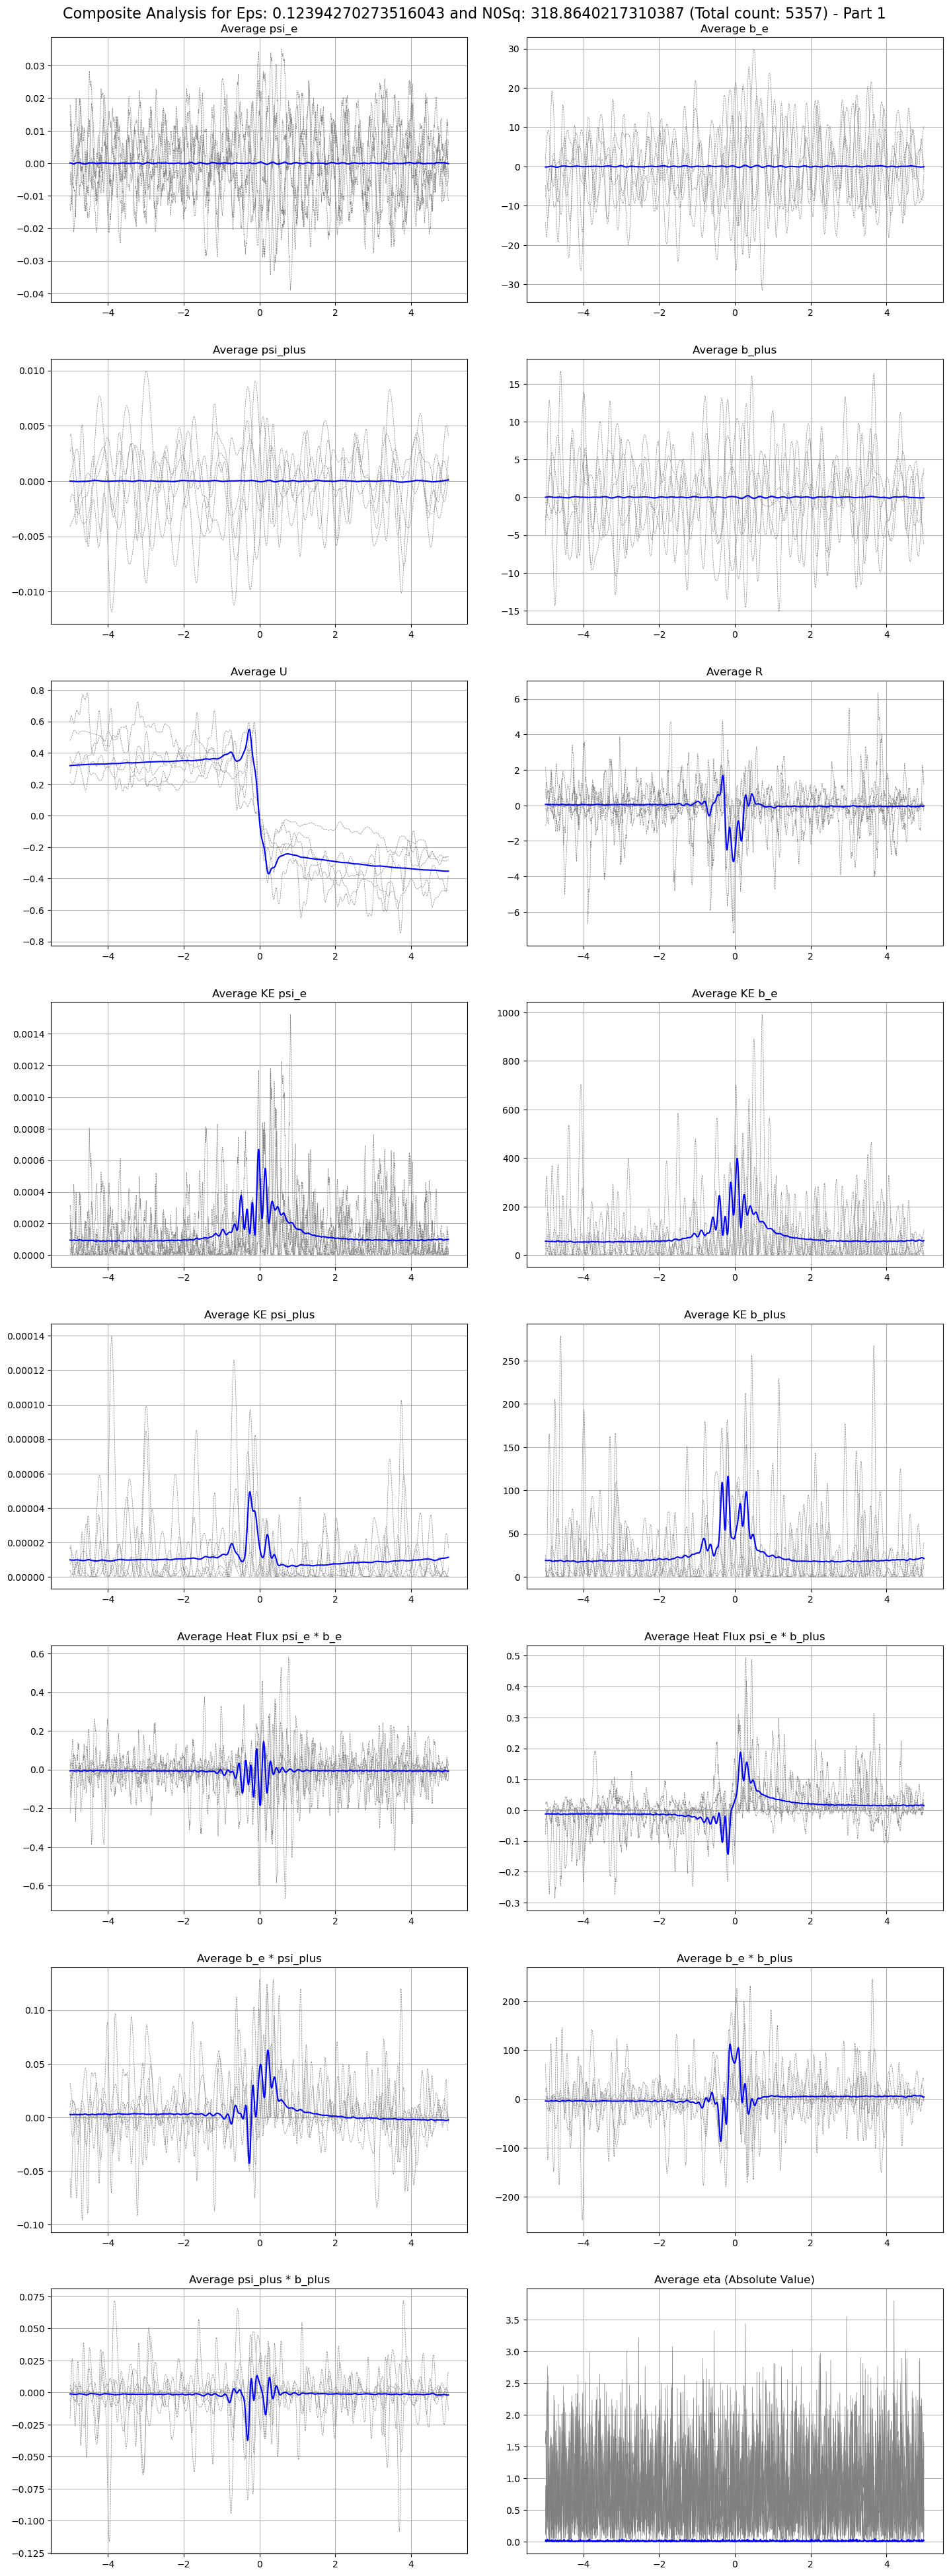

In [15]:
time_array = np.arange(-window_size/10, window_size/10) * dt * 10

fig, axs = plt.subplots(8, 2, figsize=(15, 40))

for i in range(5):
    axs[0, 0].plot(time_array, df1['psi_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 0].plot(time_array, df1_average_psi_e, label='Average', linewidth=1.5, color='blue')
axs[0, 0].set_title(f'Average psi_e')
axs[0, 0].grid()


for i in range(5):
    axs[0, 1].plot(time_array, df1['b_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 1].plot(time_array, df1_average_b_e, label='Average', linewidth=1.5, color='blue')
axs[0, 1].set_title(f'Average b_e')
axs[0, 1].grid()

for i in range(5):
    axs[1, 0].plot(time_array, df1['psi_plus'][i],linewidth=0.5, linestyle='--', color='gray') 
axs[1, 0].plot(time_array, df1_average_psi_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 0].set_title(f'Average psi_plus')
axs[1, 0].grid()

for i in range(5):
    axs[1, 1].plot(time_array, df1['b_plus'][i], linewidth=0.5, linestyle='--', color='gray')
axs[1, 1].plot(time_array, df1_average_b_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 1].set_title(f'Average b_plus')
axs[1, 1].grid()

for i in range(5):
    axs[2, 0].plot(time_array, df1['u_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 0].plot(time_array, df1_average_U, label='Average', linewidth=1.5, color='blue')
axs[2, 0].set_title(f'Average U')
axs[2, 0].grid()

for i in range(5):
    axs[2, 1].plot(time_array, df1['r_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 1].plot(time_array, df1_average_R, label='Average', linewidth=1.5, color='blue')
axs[2, 1].set_title(f'Average R')
axs[2, 1].grid()

for i in range(5):
    axs[3, 0].plot(time_array, df1['k_e_psi_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[3, 0].plot(time_array, df1_average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 0].set_title(f'Average KE psi_e')
axs[3, 0].grid()

for i in range(5):
    axs[3, 1].plot(time_array, df1['k_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[3, 1].plot(time_array, df1_average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 1].set_title(f'Average KE b_e')
axs[3, 1].grid()

for i in range(5):
    axs[4, 0].plot(time_array, df1['k_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[4, 0].plot(time_array, df1_average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 0].set_title(f'Average KE psi_plus')
axs[4, 0].grid()

for i in range(5):
    axs[4, 1].plot(time_array, df1['k_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[4, 1].plot(time_array, df1_average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 1].set_title(f'Average KE b_plus')
axs[4, 1].grid()

for i in range(5):
    axs[5, 0].plot(time_array, df1['heat_flux_psi_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 0].plot(time_array, df1_average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
axs[5, 0].grid()

for i in range(5):
    axs[5, 1].plot(time_array, df1['heat_flux_psi_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 1].plot(time_array, df1_average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
axs[5, 1].grid()

for i in range(5):
    axs[6, 0].plot(time_array, df1['b_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 0].plot(time_array, df1_average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 0].set_title(f'Average b_e * psi_plus')
axs[6, 0].grid()

for i in range(5):
    axs[6, 1].plot(time_array, df1['b_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 1].plot(time_array, df1_average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 1].set_title(f'Average b_e * b_plus')
axs[6, 1].grid()

for i in range(5):
    axs[7, 0].plot(time_array, df1['psi_plus_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[7, 0].plot(time_array, df1_average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[7, 0].set_title(f'Average psi_plus * b_plus')
axs[7, 0].grid()


for i in range(5):
    axs[7, 1].plot(time_array, [abs(i[0]) for i in df1['eta_list'][i]], linewidth=0.5, linestyle='-', label=f'eta_list {i}', color = 'gray')
axs[7, 1].plot(time_array, [abs(i[0]) for i in df1_average_eta], label='Average', linewidth=1.5, color='blue')
axs[7, 1].set_title('Average eta (Absolute Value)')
axs[7, 1].grid()


plt.suptitle(f'Composite Analysis for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df1['b_e']))}) - Part 1', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

plt.tight_layout(pad = 3)

plt.show()

Plotting the Second Half

In [16]:
df2.reset_index(drop=True, inplace = True)

In [17]:
df2_average_psi_e = average_arrays(*list(df2['psi_e']))
df2_average_b_e = average_arrays(*list(df2['b_e']))
df2_average_psi_plus = average_arrays(*list(df2['psi_plus']))
df2_average_b_plus = average_arrays(*list(df2['b_plus']))
df2_average_U = average_arrays(*list(df2['u_list']))
df2_average_R = average_arrays(*list(df2['r_list']))
df2_average_k_e_psi_e_list = average_arrays(*list(df2['k_e_psi_e_list']))
df2_average_k_e_b_e_list = average_arrays(*list(df2['k_e_b_e_list']))
df2_average_k_e_psi_plus_list = average_arrays(*list(df2['k_e_psi_plus_list']))
df2_average_k_e_b_plus_list = average_arrays(*list(df2['k_e_b_plus_list']))
df2_average_heat_flux_psi_e_b_e_list = average_arrays(*list(df2['heat_flux_psi_e_b_e_list']))
df2_average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df2['heat_flux_psi_e_b_plus_list']))
df2_average_b_e_psi_plus_list = average_arrays(*list(df2['b_e_psi_plus_list']))
df2_average_b_e_b_plus_list = average_arrays(*list(df2['b_e_b_plus_list']))
df2_average_psi_plus_b_plus_list = average_arrays(*list(df2['psi_plus_b_plus_list']))
df2_average_eta = average_arrays(*list(df2['eta_list']))

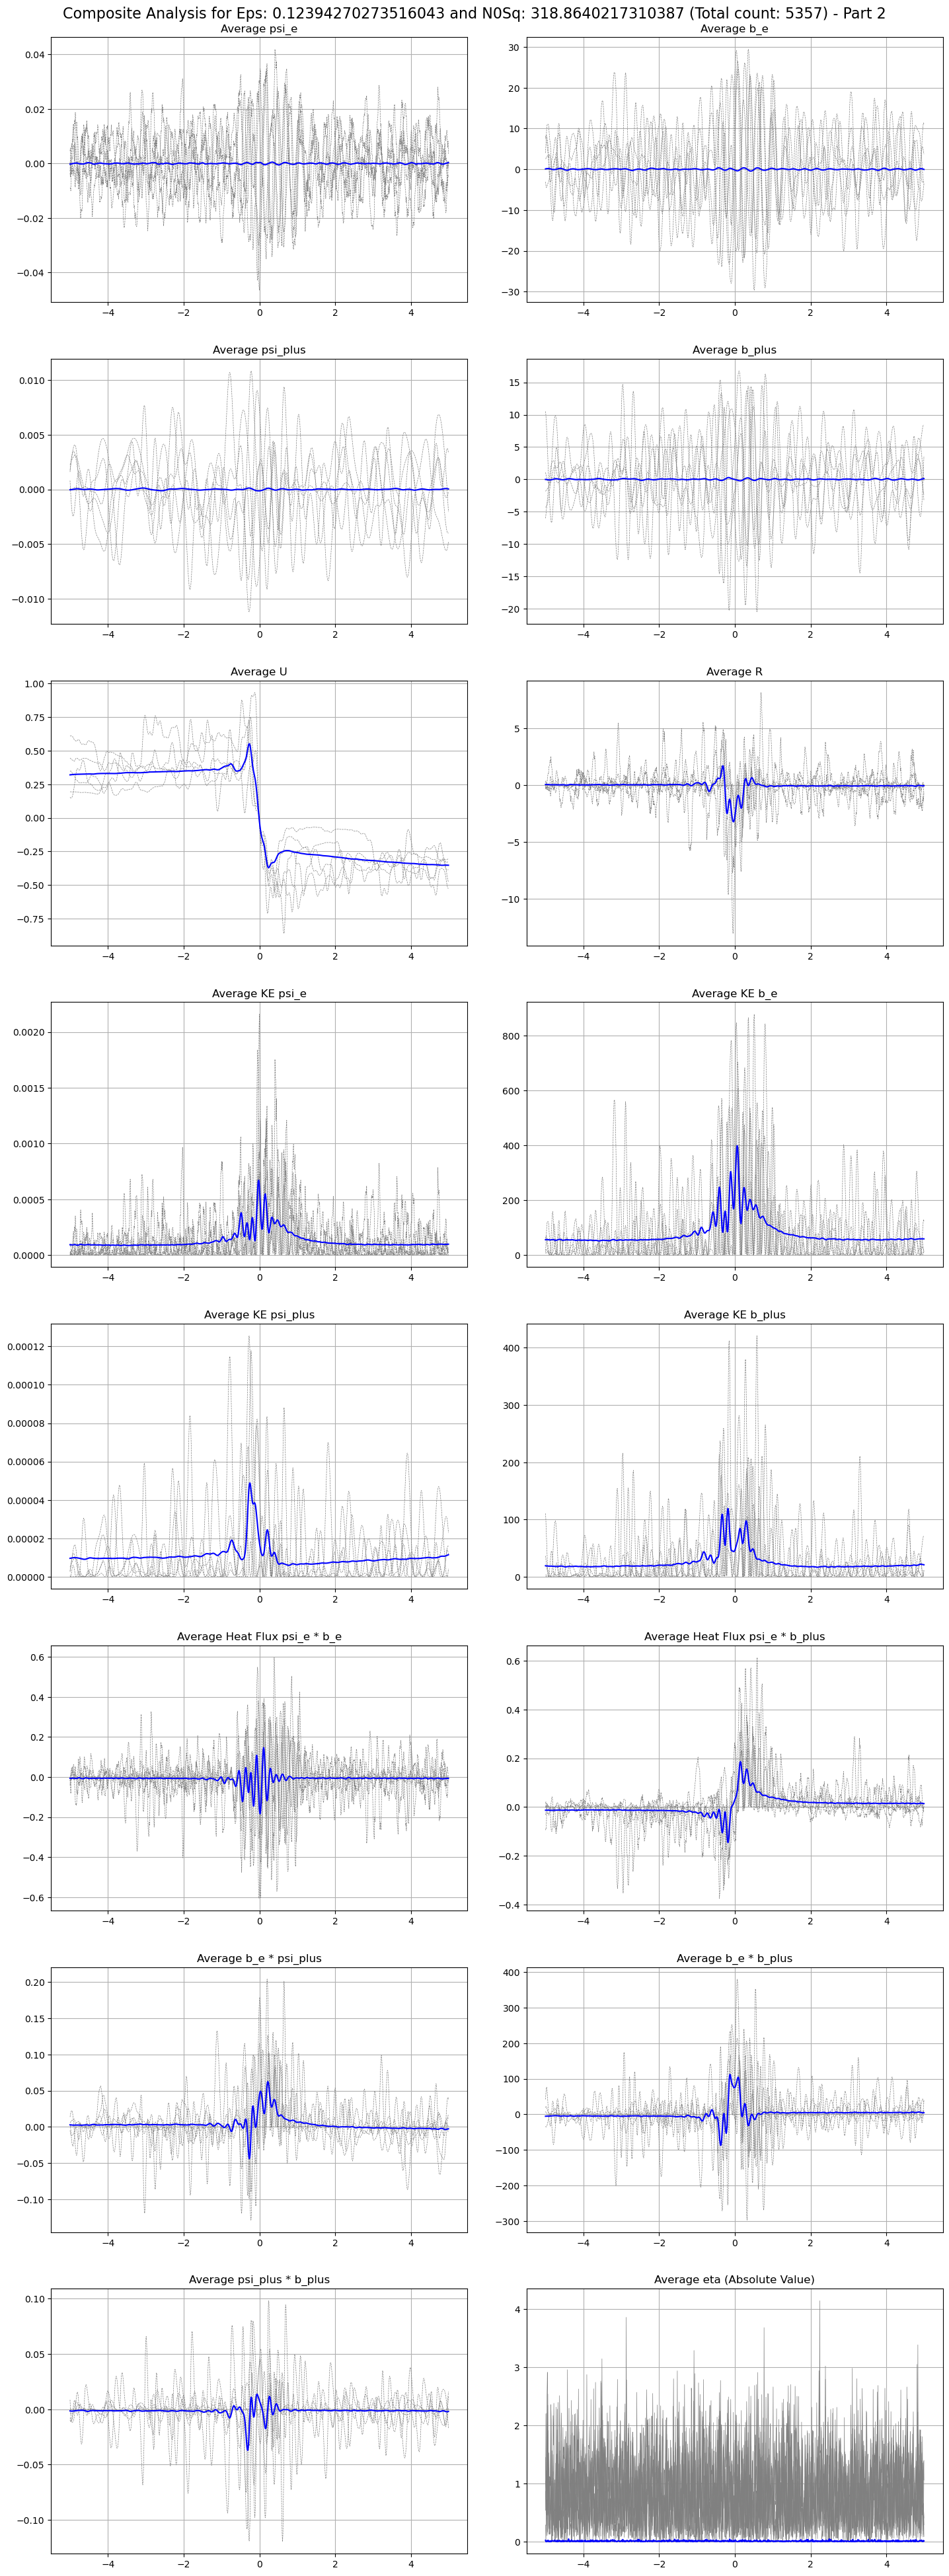

In [18]:
time_array = np.arange(-window_size/10, window_size/10) * dt * 10

fig, axs = plt.subplots(8, 2, figsize=(15, 40))

for i in range(5):
    axs[0, 0].plot(time_array, df2['psi_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 0].plot(time_array, df2_average_psi_e, label='Average', linewidth=1.5, color='blue')
axs[0, 0].set_title(f'Average psi_e')
axs[0, 0].grid()


for i in range(5):
    axs[0, 1].plot(time_array, df2['b_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 1].plot(time_array, df2_average_b_e, label='Average', linewidth=1.5, color='blue')
axs[0, 1].set_title(f'Average b_e')
axs[0, 1].grid()

for i in range(5):
    axs[1, 0].plot(time_array, df2['psi_plus'][i],linewidth=0.5, linestyle='--', color='gray') 
axs[1, 0].plot(time_array, df2_average_psi_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 0].set_title(f'Average psi_plus')
axs[1, 0].grid()

for i in range(5):
    axs[1, 1].plot(time_array, df2['b_plus'][i], linewidth=0.5, linestyle='--', color='gray')
axs[1, 1].plot(time_array, df2_average_b_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 1].set_title(f'Average b_plus')
axs[1, 1].grid()

for i in range(5):
    axs[2, 0].plot(time_array, df2['u_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 0].plot(time_array, df2_average_U, label='Average', linewidth=1.5, color='blue')
axs[2, 0].set_title(f'Average U')
axs[2, 0].grid()

for i in range(5):
    axs[2, 1].plot(time_array, df2['r_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 1].plot(time_array, df2_average_R, label='Average', linewidth=1.5, color='blue')
axs[2, 1].set_title(f'Average R')
axs[2, 1].grid()

for i in range(5):
    axs[3, 0].plot(time_array, df2['k_e_psi_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[3, 0].plot(time_array, df2_average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 0].set_title(f'Average KE psi_e')
axs[3, 0].grid()

for i in range(5):
    axs[3, 1].plot(time_array, df2['k_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[3, 1].plot(time_array, df2_average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 1].set_title(f'Average KE b_e')
axs[3, 1].grid()

for i in range(5):
    axs[4, 0].plot(time_array, df2['k_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[4, 0].plot(time_array, df2_average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 0].set_title(f'Average KE psi_plus')
axs[4, 0].grid()

for i in range(5):
    axs[4, 1].plot(time_array, df2['k_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[4, 1].plot(time_array, df2_average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 1].set_title(f'Average KE b_plus')
axs[4, 1].grid()

for i in range(5):
    axs[5, 0].plot(time_array, df2['heat_flux_psi_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 0].plot(time_array, df2_average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
axs[5, 0].grid()

for i in range(5):
    axs[5, 1].plot(time_array, df2['heat_flux_psi_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 1].plot(time_array, df2_average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
axs[5, 1].grid()

for i in range(5):
    axs[6, 0].plot(time_array, df2['b_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 0].plot(time_array, df2_average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 0].set_title(f'Average b_e * psi_plus')
axs[6, 0].grid()

for i in range(5):
    axs[6, 1].plot(time_array, df2['b_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 1].plot(time_array, df2_average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 1].set_title(f'Average b_e * b_plus')
axs[6, 1].grid()

for i in range(5):
    axs[7, 0].plot(time_array, df2['psi_plus_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[7, 0].plot(time_array, df2_average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[7, 0].set_title(f'Average psi_plus * b_plus')
axs[7, 0].grid()

average_eta = [[abs(i) for i in sublist] for sublist in average_eta]

for i in range(5):
    axs[7, 1].plot(time_array, [abs(i[0]) for i in df2['eta_list'][i]], linewidth=0.5, linestyle='-', label=f'eta_list {i}', color = 'gray')
axs[7, 1].plot(time_array, [abs(i[0]) for i in df2_average_eta], label='Average', linewidth=1.5, color='blue')
axs[7, 1].set_title('Average eta (Absolute Value)')
axs[7, 1].grid()


plt.suptitle(f'Composite Analysis for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df2['b_e']))}) - Part 2', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

plt.tight_layout(pad = 3)

plt.show()

Plotting the composites on the same axes

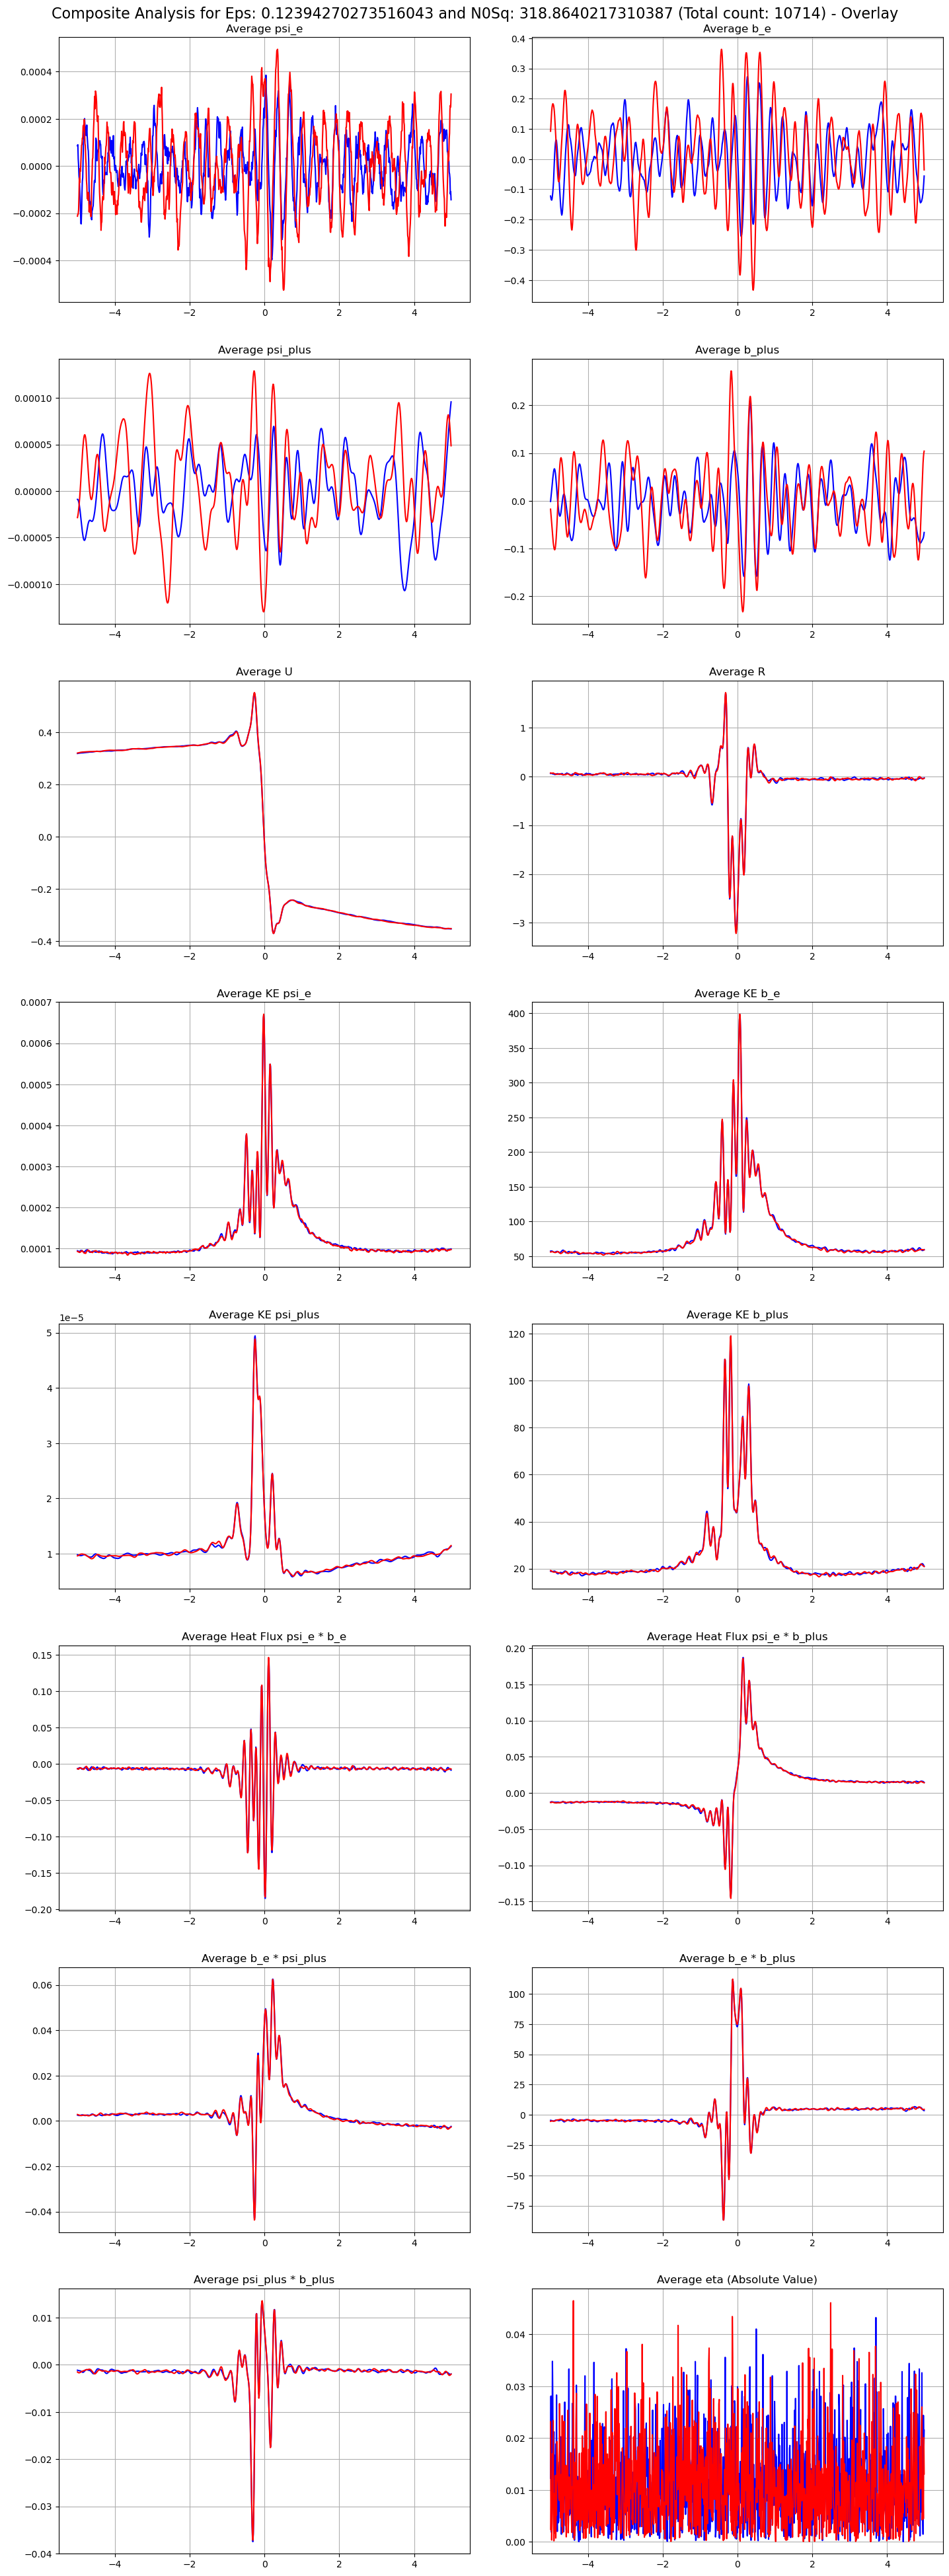

In [19]:
time_array = np.arange(-window_size/10, window_size/10) * dt * 10

fig, axs = plt.subplots(8, 2, figsize=(15, 40))

axs[0, 0].plot(time_array, df1_average_psi_e, label='Average', linewidth=1.5, color='blue')
axs[0, 0].plot(time_array, df2_average_psi_e, label='Average', linewidth=1.5, color='red')
axs[0, 0].set_title(f'Average psi_e')
axs[0, 0].grid()


axs[0, 1].plot(time_array, df1_average_b_e, label='Average', linewidth=1.5, color='blue')
axs[0, 1].plot(time_array, df2_average_b_e, label='Average', linewidth=1.5, color='red')
axs[0, 1].set_title(f'Average b_e')
axs[0, 1].grid()

axs[1, 0].plot(time_array, df1_average_psi_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 0].plot(time_array, df2_average_psi_plus, label='Average', linewidth=1.5, color='red')
axs[1, 0].set_title(f'Average psi_plus')
axs[1, 0].grid()

axs[1, 1].plot(time_array, df1_average_b_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 1].plot(time_array, df2_average_b_plus, label='Average', linewidth=1.5, color='red')
axs[1, 1].set_title(f'Average b_plus')
axs[1, 1].grid()

axs[2, 0].plot(time_array, df1_average_U, label='Average', linewidth=1.5, color='blue')
axs[2, 0].plot(time_array, df2_average_U, label='Average', linewidth=1.5, color='red')
axs[2, 0].set_title(f'Average U')
axs[2, 0].grid()

axs[2, 1].plot(time_array, df1_average_R, label='Average', linewidth=1.5, color='blue')
axs[2, 1].plot(time_array, df2_average_R, label='Average', linewidth=1.5, color='red')
axs[2, 1].set_title(f'Average R')
axs[2, 1].grid()

axs[3, 0].plot(time_array, df1_average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 0].plot(time_array, df2_average_k_e_psi_e_list, label='Average', linewidth=1.5, color='red')
axs[3, 0].set_title(f'Average KE psi_e')
axs[3, 0].grid()

axs[3, 1].plot(time_array, df1_average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 1].plot(time_array, df2_average_k_e_b_e_list, label='Average', linewidth=1.5, color='red')
axs[3, 1].set_title(f'Average KE b_e')
axs[3, 1].grid()

axs[4, 0].plot(time_array, df1_average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 0].plot(time_array, df2_average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='red')
axs[4, 0].set_title(f'Average KE psi_plus')
axs[4, 0].grid()

axs[4, 1].plot(time_array, df1_average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 1].plot(time_array, df2_average_k_e_b_plus_list, label='Average', linewidth=1.5, color='red')
axs[4, 1].set_title(f'Average KE b_plus')
axs[4, 1].grid()

axs[5, 0].plot(time_array, df1_average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[5, 0].plot(time_array, df2_average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='red')
axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
axs[5, 0].grid()

axs[5, 1].plot(time_array, df1_average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[5, 1].plot(time_array, df2_average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='red')
axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
axs[5, 1].grid()

axs[6, 0].plot(time_array, df1_average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 0].plot(time_array, df2_average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='red')
axs[6, 0].set_title(f'Average b_e * psi_plus')
axs[6, 0].grid()

axs[6, 1].plot(time_array, df1_average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 1].plot(time_array, df2_average_b_e_b_plus_list, label='Average', linewidth=1.5, color='red')
axs[6, 1].set_title(f'Average b_e * b_plus')
axs[6, 1].grid()

axs[7, 0].plot(time_array, df1_average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[7, 0].plot(time_array, df2_average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='red')
axs[7, 0].set_title(f'Average psi_plus * b_plus')
axs[7, 0].grid()

average_eta = [[abs(i) for i in sublist] for sublist in average_eta]

axs[7, 1].plot(time_array, [abs(i[0]) for i in df1_average_eta], label='Average', linewidth=1.5, color='blue')
axs[7, 1].plot(time_array, [abs(i[0]) for i in df2_average_eta], label='Average', linewidth=1.5, color='red')
axs[7, 1].set_title('Average eta (Absolute Value)')
axs[7, 1].grid()


plt.suptitle(f'Composite Analysis for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df['b_e']))}) - Overlay', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

plt.tight_layout(pad = 3)

plt.show()

Performing Clustering

In [34]:
psi_e_total = []
b_e_total = []
psi_plus_total = []
b_plus_total = []
U_total = []
R_total = []
k_e_psi_e_total = []
k_e_b_e_total = []
k_e_psi_plus_total = []
k_e_b_plus_total = []
heat_flux_psi_e_b_e_total= []
heat_flux_psi_e_b_plus_total = []
b_e_psi_plus_total = []
b_e_b_plus_total = []
psi_plus_b_plus_total= []
eta_total = []

In [35]:
for index, row in df.iterrows():
    psi_e_list = row['psi_e']
    b_e_list = row['b_e']
    psi_plus_list = row['psi_plus']
    b_plus_list = row['b_plus']
    U_list = row['u_list']
    R_list = row['r_list']
    k_e_psi_e_list = row['k_e_psi_e_list']
    k_e_b_e_list = row['k_e_b_e_list']
    k_e_psi_plus_list = row['k_e_psi_plus_list']
    k_e_b_plus_list = row['k_e_b_plus_list']
    heat_flux_psi_e_b_e_list= row['heat_flux_psi_e_b_e_list']
    heat_flux_psi_e_b_plus_list = row['heat_flux_psi_e_b_plus_list']
    b_e_psi_plus_list = row['b_e_psi_plus_list']
    b_e_b_plus_list = row['b_e_b_plus_list']
    psi_plus_b_plus_list= row['psi_plus_b_plus_list']
    eta_list = row['eta_list']

    psi_e_total.extend(psi_e_list)
    b_e_total.extend(b_e_list)
    psi_plus_total.extend(psi_plus_list)
    b_plus_total.extend(b_plus_list)
    U_total.extend(U_list)
    R_total.extend(R_list)
    k_e_psi_e_total.extend(k_e_psi_e_list)
    k_e_b_e_total.extend(k_e_b_e_list)
    k_e_psi_plus_total.extend(k_e_psi_plus_list)
    k_e_b_plus_total.extend(k_e_b_plus_list)
    heat_flux_psi_e_b_e_total.extend(heat_flux_psi_e_b_e_list)
    heat_flux_psi_e_b_plus_total.extend(heat_flux_psi_e_b_plus_list)
    b_e_psi_plus_total.extend(b_e_psi_plus_list)
    b_e_b_plus_total.extend(b_e_b_plus_list)
    psi_plus_b_plus_total.extend(psi_plus_b_plus_list)
    eta_total.extend(eta_list)

In [36]:
psi_e_total = np.array(psi_e_total)
b_e_total = np.array(b_e_total)
psi_plus_total = np.array(psi_plus_total)
b_plus_total =  np.array(b_plus_total)
U_total - np.array(U_total)
R_total = np.array(R_total)
k_e_psi_e_total = np.array(k_e_psi_e_total)
k_e_b_e_total = np.array(k_e_b_e_total)
k_e_psi_plus_total = np.array(k_e_psi_plus_total)
k_e_b_plus_total = np.array(k_e_b_plus_total)
heat_flux_psi_e_b_e_total= np.array(heat_flux_psi_e_b_e_total)
heat_flux_psi_e_b_plus_total = np.array(heat_flux_psi_e_b_plus_total)
b_e_psi_plus_total = np.array(b_e_psi_plus_total)
b_e_b_plus_total = np.array(b_e_b_plus_total)
psi_plus_b_plus_total= np.array(psi_plus_b_plus_total)
eta_total = np.array(eta_total)

In [37]:
print(len(psi_e_total))
print(len(b_e_total))
print(len(psi_plus_total))
print(len(b_plus_total))
print(len(U_total))
print(len(R_total))
print(len(k_e_psi_e_total))
print(len(k_e_b_e_total))
print(len(k_e_psi_plus_total))
print(len(k_e_b_plus_total))
print(len(heat_flux_psi_e_b_e_total))
print(len(heat_flux_psi_e_b_plus_total))
print(len(b_e_psi_plus_total))
print(len(b_e_b_plus_total))
print(len(psi_plus_b_plus_total))
print(len(eta_total))

10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000


In [39]:
data_combined = np.column_stack((psi_e_total, b_e_total, psi_plus_total, b_plus_total, U_total, R_total, k_e_psi_e_total, k_e_b_e_total, k_e_psi_plus_total, k_e_b_plus_total, heat_flux_psi_e_b_e_total, heat_flux_psi_e_b_plus_total, b_e_psi_plus_total, b_e_b_plus_total, psi_plus_b_plus_total, eta_total))
column_names = ['psi_e_total', 'b_e_total', 'psi_plus_total', 'b_plus_total', 'U_total', 'R_total', 'k_e_psi_e_total', 'k_e_b_e_total', 'k_e_psi_plus_total', 'k_e_b_plus_total', 'heat_flux_psi_e_b_e_total', 'heat_flux_psi_e_b_plus_total', 'b_e_psi_plus_total', 'b_e_b_plus_total', 'psi_plus_b_plus_total', 'eta_total']

data_combined_df = pd.DataFrame(data_combined, columns=column_names)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_combined_df)

# Step 3: Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)
clusters = kmeans.labels_

print("Cluster labels:", clusters)

data_combined_df['Cluster'] = clusters

data_combined_df.head()


Cluster labels: [1 1 1 ... 0 0 0]


psi_e_total  b_e_total  psi_plus_total  b_plus_total   U_total   R_total  \
0     0.017451  -4.771906       -0.001943     -3.097217  0.373900 -1.148065   
1     0.017817  -7.059277       -0.001749     -2.887717  0.362477 -1.055088   
2     0.015658  -9.108645       -0.001572     -2.521739  0.353207 -0.833608   
3     0.013379 -10.963888       -0.001424     -2.022189  0.345397 -0.645293   
4     0.009187 -12.231592       -0.001307     -1.419815  0.340377 -0.406681   

   k_e_psi_e_total  k_e_b_e_total  k_e_psi_plus_total  k_e_b_plus_total  \
0         0.000305      22.771086            0.000004          9.592751   
1         0.000317      49.833386            0.000003          8.338907   
2         0.000245      82.967411            0.000002          6.359169   
3         0.000179     120.206832            0.000002          4.089250   
4         0.000084     149.611848            0.000002          2.015875   

   heat_flux_psi_e_b_e_total  heat_flux_psi_e_b_plus_total  \
0                  -0.083274                     -0.054049   
1                  -0.125775                     -0.051450   
2                  -0.142619                     -0.039484   
3                  -0.146690                     -0.027056   
4                  -0.112368                     -0.013043   

   b_e_psi_plus_total  b_e_b_plus_total  psi_plus_b_plus_total  eta_total  \
0            0.009272         14.779627               0.006018  -0.109825   
1            0.012346         20.385190               0.005051   0.314193   
2            0.014323         22.969627               0.003965  -0.891066   
3            0.015618         22.171058               0.002881   0.437075   
4            0.015992         17.366600               0.001856   1.760299   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1

In [41]:

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
print("PCA components:")
print(pca.components_)

print("Explained variance by each component:")
print(pca.explained_variance_ratio_)


PCA components:
[[-0.00295591 -0.00205259  0.00231384  0.00126831 -0.47732672 -0.25073884
   0.35672019  0.32839374  0.00593047  0.23573064 -0.09967596  0.4566707
   0.37579188  0.21479584  0.11283003 -0.0016268 ]
 [ 0.00376254 -0.00893551  0.01186474 -0.00905286 -0.04828009  0.18341783
   0.23553914 -0.29525453  0.01335832  0.45047702  0.31018667  0.381197
  -0.34648218 -0.13128064 -0.48900881 -0.00269253]]
Explained variance by each component:
[0.107902   0.08845125]


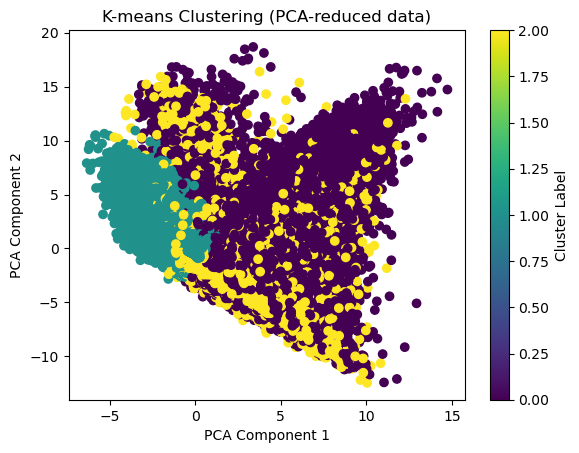

In [42]:

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (PCA-reduced data)')
plt.colorbar(label='Cluster Label')
plt.show()

In [45]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centers (original feature space):")
print(pd.DataFrame(centroids, columns=column_names))

Cluster centers (original feature space):
   psi_e_total  b_e_total  psi_plus_total  b_plus_total   U_total   R_total  \
0     0.006817  -6.130297       -0.001834      0.768665 -0.249218 -0.513348   
1     0.000354  -0.485171       -0.000168      0.052870  0.080879  0.153084   
2    -0.010653  10.784459        0.003402     -1.306454 -0.064643 -1.042877   

   k_e_psi_e_total  k_e_b_e_total  k_e_psi_plus_total  k_e_b_plus_total  \
0         0.000310     171.837064            0.000014         58.754832   
1         0.000089      51.417218            0.000009         18.632436   
2         0.000207     165.193926            0.000020         29.053402   

   heat_flux_psi_e_b_e_total  heat_flux_psi_e_b_plus_total  \
0                   0.007718                      0.083497   
1                   0.000806                     -0.008138   
2                  -0.096220                      0.012701   

   b_e_psi_plus_total  b_e_b_plus_total  psi_plus_b_plus_total  eta_total  
0            0.

In [48]:
print("PCA components (feature importance):")
print(pd.DataFrame(pca.components_, columns=column_names))

PCA components (feature importance):
   psi_e_total  b_e_total  psi_plus_total  b_plus_total   U_total   R_total  \
0    -0.002956  -0.002053        0.002314      0.001268 -0.477327 -0.250739   
1     0.003763  -0.008936        0.011865     -0.009053 -0.048280  0.183418   

   k_e_psi_e_total  k_e_b_e_total  k_e_psi_plus_total  k_e_b_plus_total  \
0         0.356720       0.328394            0.005930          0.235731   
1         0.235539      -0.295255            0.013358          0.450477   

   heat_flux_psi_e_b_e_total  heat_flux_psi_e_b_plus_total  \
0                  -0.099676                      0.456671   
1                   0.310187                      0.381197   

   b_e_psi_plus_total  b_e_b_plus_total  psi_plus_b_plus_total  eta_total  
0            0.375792          0.214796               0.112830  -0.001627  
1           -0.346482         -0.131281              -0.489009  -0.002693  


In [55]:
cyan_cluster_label = 1
cyan_cluster_points = data_combined_df[data_combined_df['Cluster'] == cyan_cluster_label]
cyan_cluster_points

psi_e_total  b_e_total  psi_plus_total  b_plus_total   U_total  \
0            0.017451  -4.771906   -1.943025e-03     -3.097217  0.373900   
1            0.017817  -7.059277   -1.748967e-03     -2.887717  0.362477   
2            0.015658  -9.108645   -1.572411e-03     -2.521739  0.353207   
3            0.013379 -10.963888   -1.424456e-03     -2.022189  0.345397   
4            0.009187 -12.231592   -1.307438e-03     -1.419815  0.340377   
...               ...        ...             ...           ...       ...   
10713947     0.009637  11.260126    2.005021e-04      2.842590 -0.229703   
10713948     0.014893   9.648534   -1.856485e-07      3.284085 -0.229145   
10713949     0.016752   7.335504   -2.189166e-04      3.610896 -0.229622   
10713950     0.017581   5.135345   -4.552397e-04      3.810008 -0.231341   
10713951     0.016547   2.913563   -6.986000e-04      3.883878 -0.234411   

           R_total  k_e_psi_e_total  k_e_b_e_total  k_e_psi_plus_total  \
0        -1.148065         0.000305      22.771086        3.775347e-06   
1        -1.055088         0.000317      49.833386        3.058885e-06   
2        -0.833608         0.000245      82.967411        2.472476e-06   
3        -0.645293         0.000179     120.206832        2.029074e-06   
4        -0.406681         0.000084     149.611848        1.709393e-06   
...            ...              ...            ...                 ...   
10713947  0.065425         0.000093     126.790449        4.020109e-08   
10713948 -0.000094         0.000222      93.094203        3.446535e-14   
10713949 -0.124174         0.000281      53.809619        4.792446e-08   
10713950 -0.270999         0.000309      26.371765        2.072432e-07   
10713951 -0.391406         0.000274       8.488852        4.880420e-07   

          k_e_b_plus_total  heat_flux_psi_e_b_e_total  \
0                 9.592751                  -0.083274   
1                 8.338907                  -0.125775   
2                 6.359169                  -0.142619   
3                 4.089250                  -0.146690   
4                 2.015875                  -0.112368   
...                    ...                        ...   
10713947          8.080316                   0.108517   
10713948         10.785211                   0.143699   
10713949         13.038572                   0.122888   
10713950         14.516159                   0.090287   
10713951         15.084511                   0.048211   

          heat_flux_psi_e_b_plus_total  b_e_psi_plus_total  b_e_b_plus_total  \
0                            -0.054049            0.009272         14.779627   
1                            -0.051450            0.012346         20.385190   
2                            -0.039484            0.014323         22.969627   
3                            -0.027056            0.015618         22.171058   
4                            -0.013043            0.015992         17.366600   
...                                ...                 ...               ...   
10713947                      0.027395            0.002258         32.007918   
10713948                      0.048911           -0.000002         31.686600   
10713949                      0.060491           -0.001606         26.487744   
10713950                      0.066986           -0.002338         19.565703   
10713951                      0.064268           -0.002035         11.315926   

          psi_plus_b_plus_total  eta_total  Cluster  
0                  6.017970e-03  -0.109825        1  
1                  5.050521e-03   0.314193        1  
2                  3.965211e-03  -0.891066        1  
3                  2.880520e-03   0.437075        1  
4                  1.856320e-03   1.760299        1  
...                         ...        ...      ...  
10713947           5.699452e-04  -0.300107        1  
10713948          -6.096852e-07  -0.353032        1  
10713949          -7.904850e-04  -0.294475        1  
10713950          -1.7

In [54]:
cyan_cluster_points[['U_total']]

U_total
0         0.373900
1         0.362477
2         0.353207
3         0.345397
4         0.340377
...            ...
10713947 -0.229703
10713948 -0.229145
10713949 -0.229622
10713950 -0.231341
10713951 -0.234411

[8138543 rows x 1 columns]

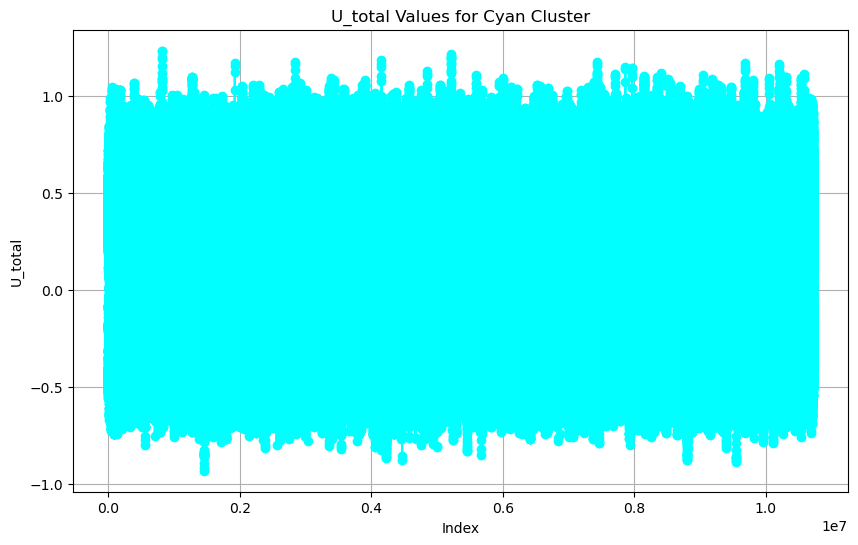

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(cyan_cluster_points.index, cyan_cluster_points['U_total'], linestyle='-', marker='o', color='cyan')
plt.xlabel('Index')
plt.ylabel('U_total')
plt.title('U_total Values for Cyan Cluster')
plt.grid(True)
plt.show()

/home/baasil/anaconda3/envs/simulations_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


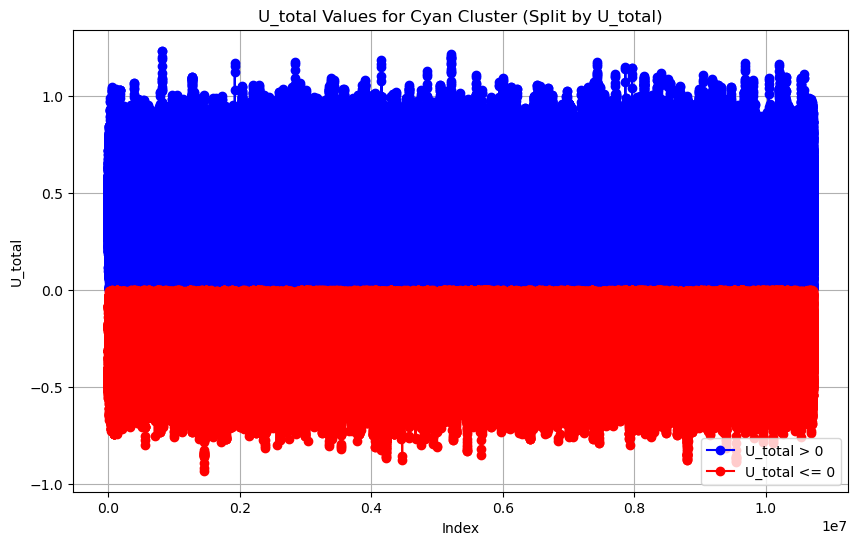

In [63]:
cyan_cluster_positive = cyan_cluster_points[cyan_cluster_points['U_total'] > 0]
cyan_cluster_non_positive = cyan_cluster_points[cyan_cluster_points['U_total'] <= 0]


plt.figure(figsize=(10, 6))
plt.plot(cyan_cluster_positive.index, cyan_cluster_positive['U_total'], linestyle='-', marker='o', color='blue', label='U_total > 0')
plt.plot(cyan_cluster_non_positive.index, cyan_cluster_non_positive['U_total'], linestyle='-', marker='o', color='red', label='U_total <= 0')
plt.xlabel('Index')
plt.ylabel('U_total')
plt.title('U_total Values for Cyan Cluster (Split by U_total)')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
cyan_cluster_positive.head()

psi_e_total  b_e_total  psi_plus_total  b_plus_total   U_total   R_total  \
0     0.017451  -4.771906       -0.001943     -3.097217  0.373900 -1.148065   
1     0.017817  -7.059277       -0.001749     -2.887717  0.362477 -1.055088   
2     0.015658  -9.108645       -0.001572     -2.521739  0.353207 -0.833608   
3     0.013379 -10.963888       -0.001424     -2.022189  0.345397 -0.645293   
4     0.009187 -12.231592       -0.001307     -1.419815  0.340377 -0.406681   

   k_e_psi_e_total  k_e_b_e_total  k_e_psi_plus_total  k_e_b_plus_total  \
0         0.000305      22.771086            0.000004          9.592751   
1         0.000317      49.833386            0.000003          8.338907   
2         0.000245      82.967411            0.000002          6.359169   
3         0.000179     120.206832            0.000002          4.089250   
4         0.000084     149.611848            0.000002          2.015875   

   heat_flux_psi_e_b_e_total  heat_flux_psi_e_b_plus_total  \
0                  -0.083274                     -0.054049   
1                  -0.125775                     -0.051450   
2                  -0.142619                     -0.039484   
3                  -0.146690                     -0.027056   
4                  -0.112368                     -0.013043   

   b_e_psi_plus_total  b_e_b_plus_total  psi_plus_b_plus_total  eta_total  \
0            0.009272         14.779627               0.006018  -0.109825   
1            0.012346         20.385190               0.005051   0.314193   
2            0.014323         22.969627               0.003965  -0.891066   
3            0.015618         22.171058               0.002881   0.437075   
4            0.015992         17.366600               0.001856   1.760299   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1

In [65]:
cyan_cluster_non_positive.head()

psi_e_total  b_e_total  psi_plus_total  b_plus_total   U_total   R_total  \
626     0.013513  11.984727        0.004554      0.795640 -0.507654  2.083664   
633     0.016992  -7.496788        0.002449      5.732550 -0.332424  1.408710   
634     0.010557  -9.435280        0.002057      5.429343 -0.321966  0.735402   
635     0.005068 -10.633803        0.001685      5.000558 -0.316818  0.289112   
636     0.003076 -11.291294        0.001341      4.483994 -0.314540  0.139693   

     k_e_psi_e_total  k_e_b_e_total  k_e_psi_plus_total  k_e_b_plus_total  \
626         0.000183     143.633671            0.000021          0.633043   
633         0.000289      56.201837            0.000006         32.862134   
634         0.000111      89.024506            0.000004         29.477766   
635         0.000026     113.077764            0.000003         25.005581   
636         0.000009     127.493315            0.000002         20.106206   

     heat_flux_psi_e_b_e_total  heat_flux_psi_e_b_plus_total  \
626                   0.161951                      0.010752   
633                  -0.127382                      0.097405   
634                  -0.099606                      0.057316   
635                  -0.053895                      0.025344   
636                  -0.034731                      0.013793   

     b_e_psi_plus_total  b_e_b_plus_total  psi_plus_b_plus_total  eta_total  \
626            0.054579          9.535526               0.003623   0.125527   
633           -0.018357        -42.975717               0.014037   0.748363   
634           -0.019412        -51.227371               0.011170  -0.097378   
635           -0.017915        -53.174949               0.008425  -1.155658   
636           -0.015145        -50.630099               0.006014   1.274385   

     Cluster  
626        1  
633        1  
634        1  
635        1  
636        1

In [74]:
cyan_cluster_near_zero = cyan_cluster_points[(cyan_cluster_points['U_total'] > -.0001) & (cyan_cluster_points['U_total'] < .0001)]
cyan_cluster_near_zero.head()

psi_e_total  b_e_total  psi_plus_total  b_plus_total   U_total  \
181499    -0.018643  -1.512257        0.000590     -0.797911  0.000093   
231499    -0.015085  -6.661313        0.001343     -3.165877  0.000088   
418499     0.013678  -1.973721       -0.000490      0.883408  0.000026   
422499    -0.005538   0.150621        0.002545     -2.963599  0.000072   
588499     0.005919  -3.755512       -0.004351      5.821979  0.000024   

         R_total  k_e_psi_e_total  k_e_b_e_total  k_e_psi_plus_total  \
181499 -0.372232         0.000348       2.286922        3.477214e-07   
231499 -0.686104         0.000228      44.373095        1.804334e-06   
418499 -0.226949         0.000187       3.895574        2.401408e-07   
422499 -0.477173         0.000031       0.022687        6.475952e-06   
588499 -0.871995         0.000035      14.103869        1.893251e-05   

        k_e_b_plus_total  heat_flux_psi_e_b_e_total  \
181499          0.636661                   0.028194   
231499         10.022774                   0.100489   
418499          0.780410                  -0.026997   
422499          8.782918                  -0.000834   
588499         33.895440                  -0.022228   

        heat_flux_psi_e_b_plus_total  b_e_psi_plus_total  b_e_b_plus_total  \
181499                      0.014876           -0.000892          1.206646   
231499                      0.047759           -0.008948         21.088895   
418499                      0.012083            0.000967         -1.743601   
422499                      0.016412            0.000383         -0.446380   
588499                      0.034459            0.016341        -21.864512   

        psi_plus_b_plus_total  eta_total  Cluster  
181499              -0.000471   1.445036        1  
231499              -0.004253  -1.657061        1  
418499              -0.000433   1.291665        1  
422499              -0.007542  -1.157935        1  
588499              -0.025332   1.057168        1